In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
import statsmodels.api
import statsmodels.formula.api
import statistics
from sklearn import decomposition
from sklearn import preprocessing
from functions import *
%matplotlib inline

In [2]:
# charger les données
data = pd.read_csv("../CSV-Excels/P3_final_dataframe.xlsx", low_memory=False)

In [3]:
# enlever la première colonne index
data = data.loc[:,'code':]

In [4]:
# choix de laisser nan aux variables non imputées
data.isnull().sum()
# data

code                                0
product_name                        0
generic_name                   213371
packaging                      196136
brands                              0
origins_tags                        0
image_url                           0
manufacturing_places_tags      204477
labels_fr                           0
additives_n                         0
ingredients_from_palm_oil_n         0
energy_100g                         0
fat_100g                            0
saturated-fat_100g                  0
carbohydrates_100g                  0
sugars_100g                         0
fiber_100g                          0
proteins_100g                       0
salt_100g                           0
pnns_groups_1                       0
pnns_groups_2                       0
nutrition_grade_fr                  0
dtype: int64

In [5]:
# dernier nettoyage pour assembler quelques valeurs de colonnes
# variable manufacturing_places_tags
data.loc[(data['manufacturing_places_tags'] == 'france') |
         (data['manufacturing_places_tags'] == 'france,bretagne') |
        (data['manufacturing_places_tags'] == 'bretagne,france') |
         (data['manufacturing_places_tags'] == 'provence,france') |
        (data['manufacturing_places_tags'] == 'normandie,france'), 'manufacturing_places_tags'] = 'France'
data.loc[data['manufacturing_places_tags'] == 'deutschland', 'manufacturing_places_tags'] = 'allemagne'

In [6]:
# variable labels_fr
data.loc[(data['labels_fr'] == 'Bio,Bio européen,AB Agriculture Biologique ') |
         (data['labels_fr'] == 'Bio,Bio européen,FR-BIO-01,AB Agriculture Biologique') |
        (data['labels_fr'] == 'Bio,Bio européen,Point Vert,AB Agriculture Biologique') |
         (data['labels_fr'] == 'Bio,Bio européen'), 'labels_fr'] = 'Bio'

In [7]:
# variable pnns_groups_1
data.loc[data['pnns_groups_1'] == 'sugary-snacks', 'pnns_groups_1'] = 'Sugary snacks'
data.loc[data['pnns_groups_1'] == 'fruits-and-vegetables', 'pnns_groups_1'] = 'Fruits and vegetables'

In [8]:
# variable pnns_groups_2
data.loc[data['pnns_groups_2'] == 'vegetables', 'pnns_groups_2'] = 'Vegetables'
data.loc[data['pnns_groups_2'] == 'fruits', 'pnns_groups_2'] = 'Fruits'

In [9]:
# variable packaging
data.loc[data['packaging'] == 'sachet,plastique', 'packaging'] = 'Sachet,Plastique'
data.loc[data['packaging'] == 'Plastic', 'packaging'] = 'Plastique'
data.loc[data['packaging'] == 'Kunststoff', 'packaging'] = 'Plastique'
data.loc[data['packaging'] == 'Sachet,plastique', 'packaging'] = 'Sachet,Plastique'
data.loc[data['packaging'] == 'barquette,plastique', 'packaging'] = 'Barquette,Plastique'

## 1- Analyse univariée

In [10]:
# describe
data.describe(include='all')

,code,product_name,generic_name,packaging,brands,origins_tags,image_url,manufacturing_places_tags,labels_fr,additives_n,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,pnns_groups_1,pnns_groups_2,nutrition_grade_fr
count,213371,213371,0.0,17235,213371,213371,213371,8894,213371,213371.000000,...,213371.000000,213371.000000,213371.000000,213371.000000,213371.000000,213371.000000,213371.000000,213371,213371,213371
unique,213258,150739,NaN,3103,37900,789,15262,874,2873,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,36,5
top,69276020235,Ice Cream,NaN,"Sachet,Plastique",Inconnu,Inconnu,https://encrypted-tbn0.gstatic.com/images?q=tb...,France,Inconnu,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sugary snacks,Dressings and sauces,d
freq,2,409,NaN,1422,2657,209648,198110,5224,201364,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39248,34398,57321
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.077461,...,12.726833,4.523615,32.971375,16.450846,2.429684,6.979674,1.666147,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.573140,...,17.865052,7.762604,29.494180,21.646803,4.605648,8.299158,6.471847,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,6.400000,1.100000,0.000000,0.400000,0.060000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,4.760000,1.000000,21.880000,6.000000,0.800000,4.440000,0.591820,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,...,20.000000,6.620000,60.000000,24.420000,3.300000,10.000000,1.400000,NaN,NaN,NaN


In [11]:
data.columns

Index(['code', 'product_name', 'generic_name', 'packaging', 'brands',
       'origins_tags', 'image_url', 'manufacturing_places_tags', 'labels_fr',
       'additives_n', 'ingredients_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'pnns_groups_1', 'pnns_groups_2',
       'nutrition_grade_fr'],
      dtype='object')

In [12]:
quant_cols = data.columns[9:-3]
quali_cols = ['packaging', 'manufacturing_places_tags', 'pnns_groups_1', 'pnns_groups_2', 'nutrition_grade_fr']

Distribution de la variable : packaging


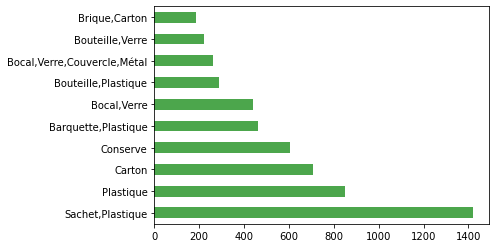

------------------------------
Distribution de la variable : manufacturing_places_tags


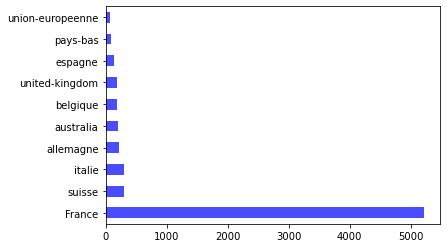

------------------------------
Distribution de la variable : pnns_groups_1


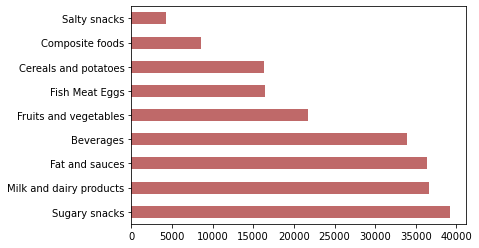

------------------------------
Distribution de la variable : pnns_groups_2


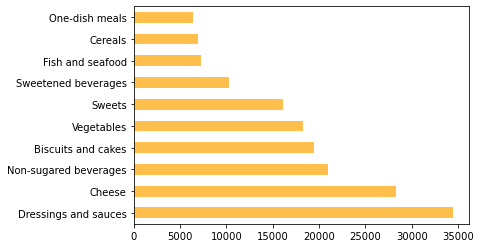

------------------------------
Distribution de la variable : nutrition_grade_fr


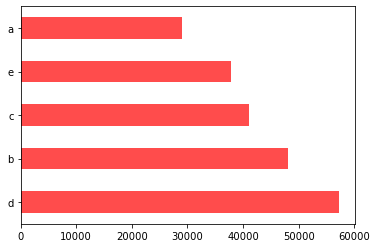

------------------------------


In [13]:
colors = ['green', 'blue', 'brown', 'orange', 'red', 'magenta', 'yellow']
for i, col in enumerate(quali_cols):
    print("Distribution de la variable : " + col)
    if len(data[col].value_counts()) < 10:
        data[col].value_counts().plot(kind='barh', color=colors[i], alpha=0.7)
    else:
        data[col].value_counts()[:10].plot(kind='barh', color=colors[i], alpha=0.7)
    plt.show()
    print('-'*30)

<AxesSubplot:>

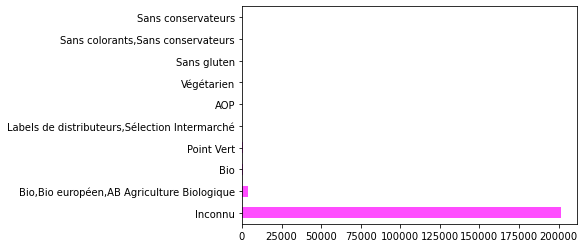

In [14]:
# plot labels_fr
data['labels_fr'].value_counts()[:10].plot(kind='barh', color='magenta', alpha=0.7)

<AxesSubplot:>

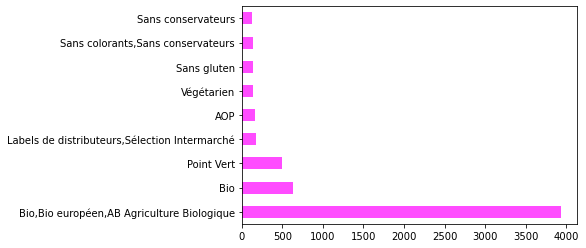

In [15]:
data['labels_fr'].value_counts()[1:10].plot(kind='barh', color='magenta', alpha=0.7)

<AxesSubplot:>

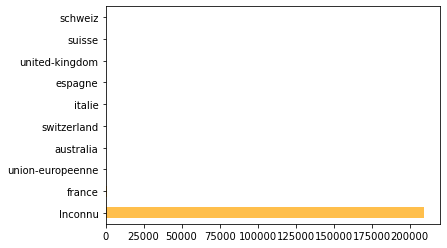

In [16]:
# origins_tags avec et sans inconnu
data['origins_tags'].value_counts()[:10].plot(kind='barh', color='orange', alpha=0.7)

<AxesSubplot:>

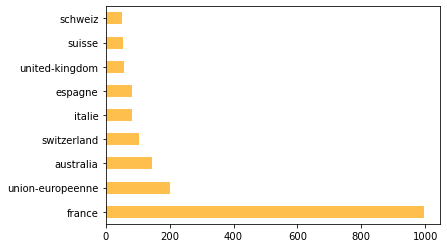

In [17]:
data['origins_tags'].value_counts()[1:10].plot(kind='barh', color='orange', alpha=0.7)

Distribution de la variable : additives_n
count    213371.000000
mean          2.077461
std           2.573140
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          31.000000
Name: additives_n, dtype: float64


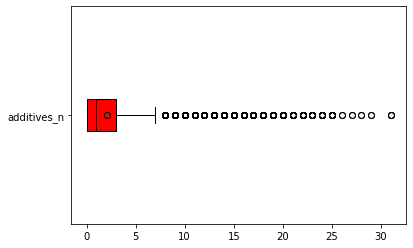

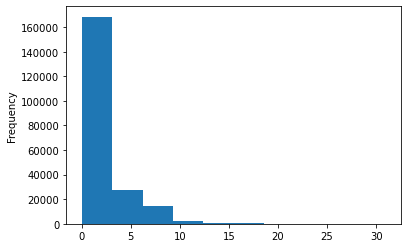

--------------------
Distribution de la variable : ingredients_from_palm_oil_n
count    213371.000000
mean          0.009444
std           0.098162
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: ingredients_from_palm_oil_n, dtype: float64


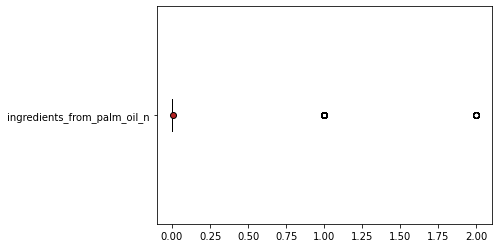

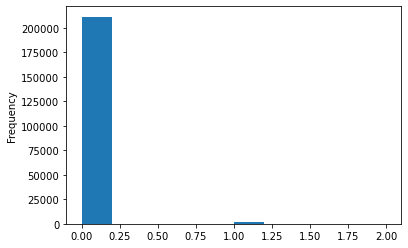

--------------------
Distribution de la variable : energy_100g
count    213371.000000
mean       1124.959456
std         793.692337
min           0.000000
25%         368.000000
50%        1117.000000
75%        1674.000000
max        3764.000000
Name: energy_100g, dtype: float64


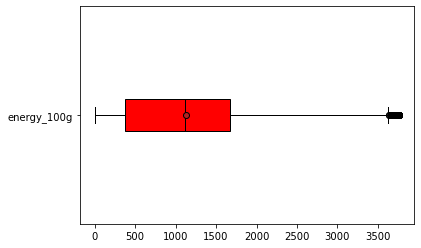

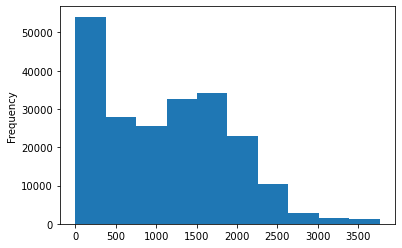

--------------------
Distribution de la variable : fat_100g
count    213371.000000
mean         12.726833
std          17.865052
min           0.000000
25%           0.000000
50%           4.760000
75%          20.000000
max         100.000000
Name: fat_100g, dtype: float64


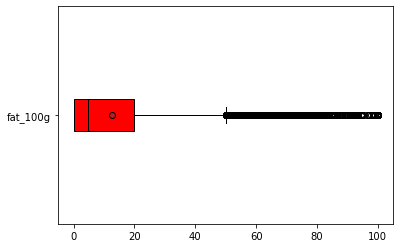

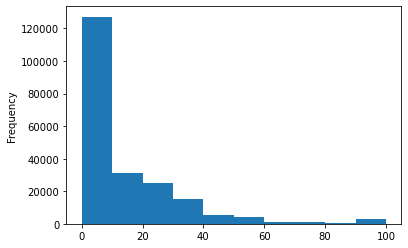

--------------------
Distribution de la variable : saturated-fat_100g
count    213371.000000
mean          4.523615
std           7.762604
min           0.000000
25%           0.000000
50%           1.000000
75%           6.620000
max         100.000000
Name: saturated-fat_100g, dtype: float64


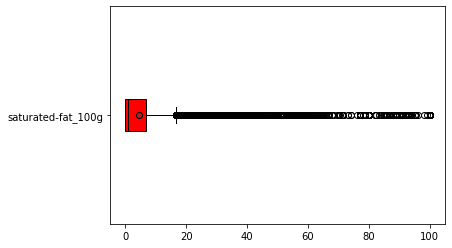

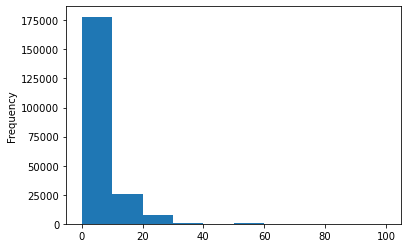

--------------------
Distribution de la variable : carbohydrates_100g
count    213371.000000
mean         32.971375
std          29.494180
min           0.000000
25%           6.400000
50%          21.880000
75%          60.000000
max         100.000000
Name: carbohydrates_100g, dtype: float64


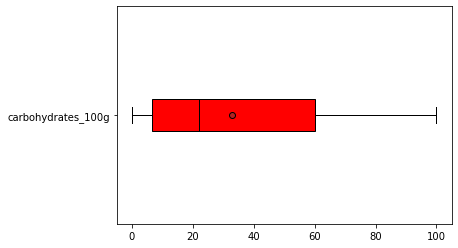

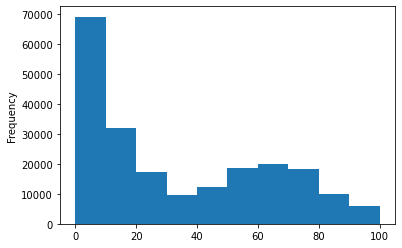

--------------------
Distribution de la variable : sugars_100g
count    213371.000000
mean         16.450846
std          21.646803
min           0.000000
25%           1.100000
50%           6.000000
75%          24.420000
max         100.000000
Name: sugars_100g, dtype: float64


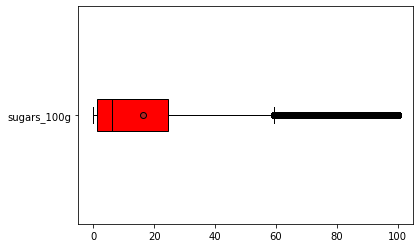

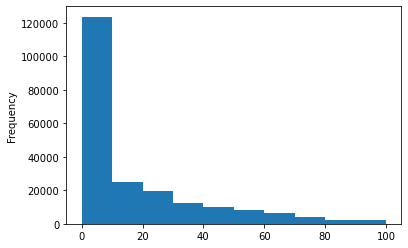

--------------------
Distribution de la variable : fiber_100g
count    213371.000000
mean          2.429684
std           4.605648
min           0.000000
25%           0.000000
50%           0.800000
75%           3.300000
max         100.000000
Name: fiber_100g, dtype: float64


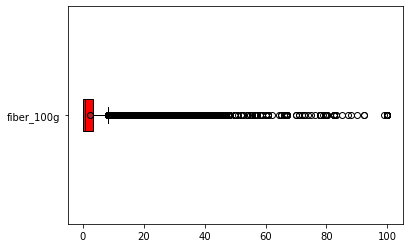

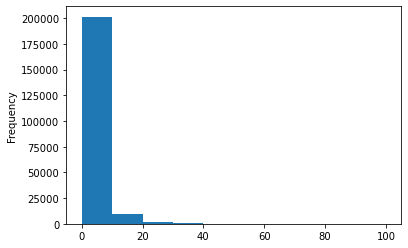

--------------------
Distribution de la variable : proteins_100g
count    213371.000000
mean          6.979674
std           8.299158
min           0.000000
25%           0.400000
50%           4.440000
75%          10.000000
max         100.000000
Name: proteins_100g, dtype: float64


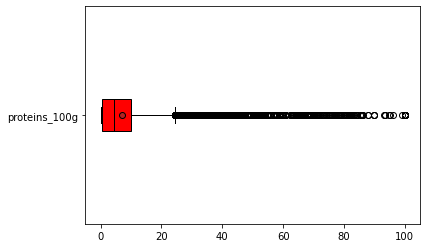

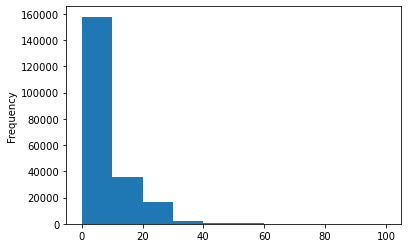

--------------------
Distribution de la variable : salt_100g
count    213371.000000
mean          1.666147
std           6.471847
min           0.000000
25%           0.060000
50%           0.591820
75%           1.400000
max         100.000000
Name: salt_100g, dtype: float64


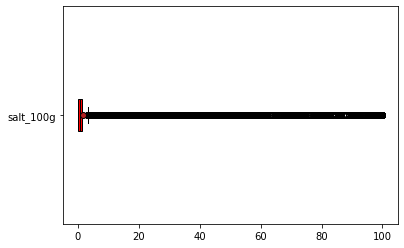

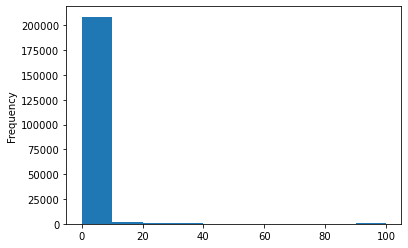

--------------------


In [18]:
for col in quant_cols:
    print("Distribution de la variable : " + col)
    print(data[col].describe())
    
    # boxplot
    plt.boxplot([data[col]], boxprops=dict(facecolor='red'), labels=[col], medianprops = {'color':"black"},
            meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'},
           showfliers=True, vert=False, showmeans=True, patch_artist=True)
    plt.show()
    
    # histogram
    data[col].plot.hist()
    plt.show()
    print("-"*20)

In [19]:
data['ingredients_from_palm_oil_n'].value_counts()

0.0    211386
1.0      1955
2.0        30
Name: ingredients_from_palm_oil_n, dtype: int64

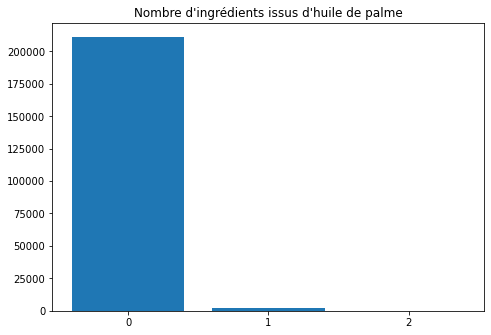

In [20]:
# bar plot variables discretes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title("Nombre d'ingrédients issus d'huile de palme")
ing_palm = ['0', '1', '2']
eff = data['ingredients_from_palm_oil_n'].value_counts().values
ax.bar(ing_palm,eff)
plt.show()

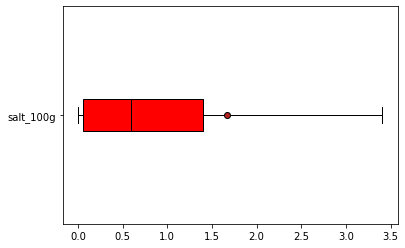

In [21]:
# salt zoom 0 - 10
plt.boxplot([data['salt_100g']], boxprops=dict(facecolor='red'), labels=[col], medianprops = {'color':"black"},
            meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'},
           showfliers=False, vert=False, showmeans=True, patch_artist=True)
plt.show()

## 2- Analyse bivariée

In [22]:
# mettre en lien deux variables, notamment que ce soit en lien avec mon appli
# trouver de potentiels corrélations

In [23]:
quant_cols

Index(['additives_n', 'ingredients_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g'],
      dtype='object')

KruskalResult(statistic=1634.3692086449796, pvalue=0.0)


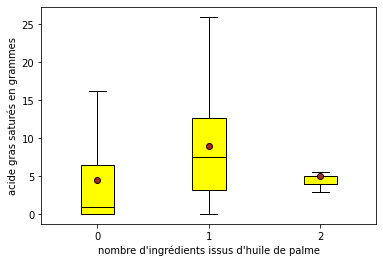

In [24]:
# sns.boxplot(y='saturated-fat_100g', x='ingredients_from_palm_oil_n', data=data, orient='v')
palm0 = data.loc[data["ingredients_from_palm_oil_n"] == 0, "saturated-fat_100g"].values
palm1 = data.loc[data["ingredients_from_palm_oil_n"] == 1, "saturated-fat_100g"].values
palm2 = data.loc[data["ingredients_from_palm_oil_n"] == 2, "saturated-fat_100g"].values

data_palm = [palm0, palm1, palm2]
print(st.kruskal(*data_palm))
plt.boxplot(data_palm, boxprops=dict(facecolor='yellow'), labels=[0,1,2], medianprops = {'color':"black"},
            meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'},
           showfliers=False, vert=True, showmeans=True, patch_artist=True)
plt.xlabel("nombre d'ingrédients issus d'huile de palme")
plt.ylabel("acide gras saturés en grammes")
plt.show()

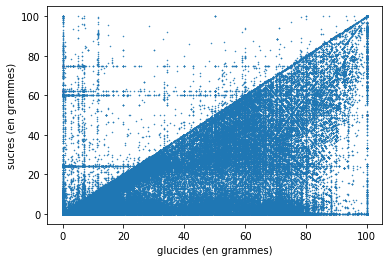

In [25]:
plt.xlabel("glucides (en grammes)")
plt.ylabel("sucres (en grammes)")
plt.plot(data["carbohydrates_100g"], data["sugars_100g"], ".", markersize=1)
plt.show()

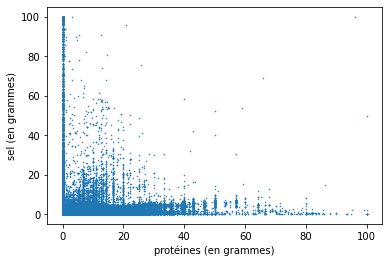

In [26]:
plt.xlabel("protéines (en grammes)")
plt.ylabel("sel (en grammes)")
plt.plot(data["proteins_100g"], data["salt_100g"],  ".", markersize=1)
plt.show()

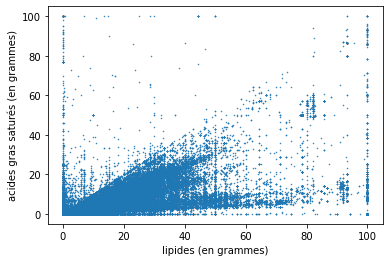

In [27]:
plt.xlabel("lipides (en grammes)")
plt.ylabel("acides gras saturés (en grammes)")
plt.plot(data["fat_100g"], data["saturated-fat_100g"], ".", markersize=1)
plt.show()

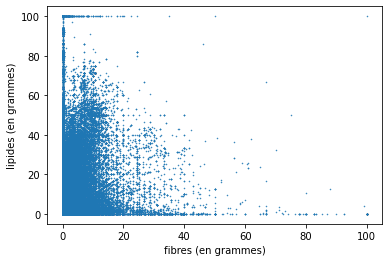

In [28]:
plt.xlabel("fibres (en grammes)")
plt.ylabel("lipides (en grammes)")
plt.plot(data["fiber_100g"], data["fat_100g"], ".", markersize=1)
plt.show()

In [29]:
print(st.pearsonr(data["carbohydrates_100g"],data["sugars_100g"])[0])

0.6231772595237212


In [30]:
print(st.pearsonr(data["saturated-fat_100g"],data["fat_100g"])[0])

0.629747811105142


In [31]:
print(st.pearsonr(data["fiber_100g"],data["fat_100g"])[0])

0.105131735979255


In [32]:
print(st.pearsonr(data["proteins_100g"],data["salt_100g"])[0])

-0.009793229267111413


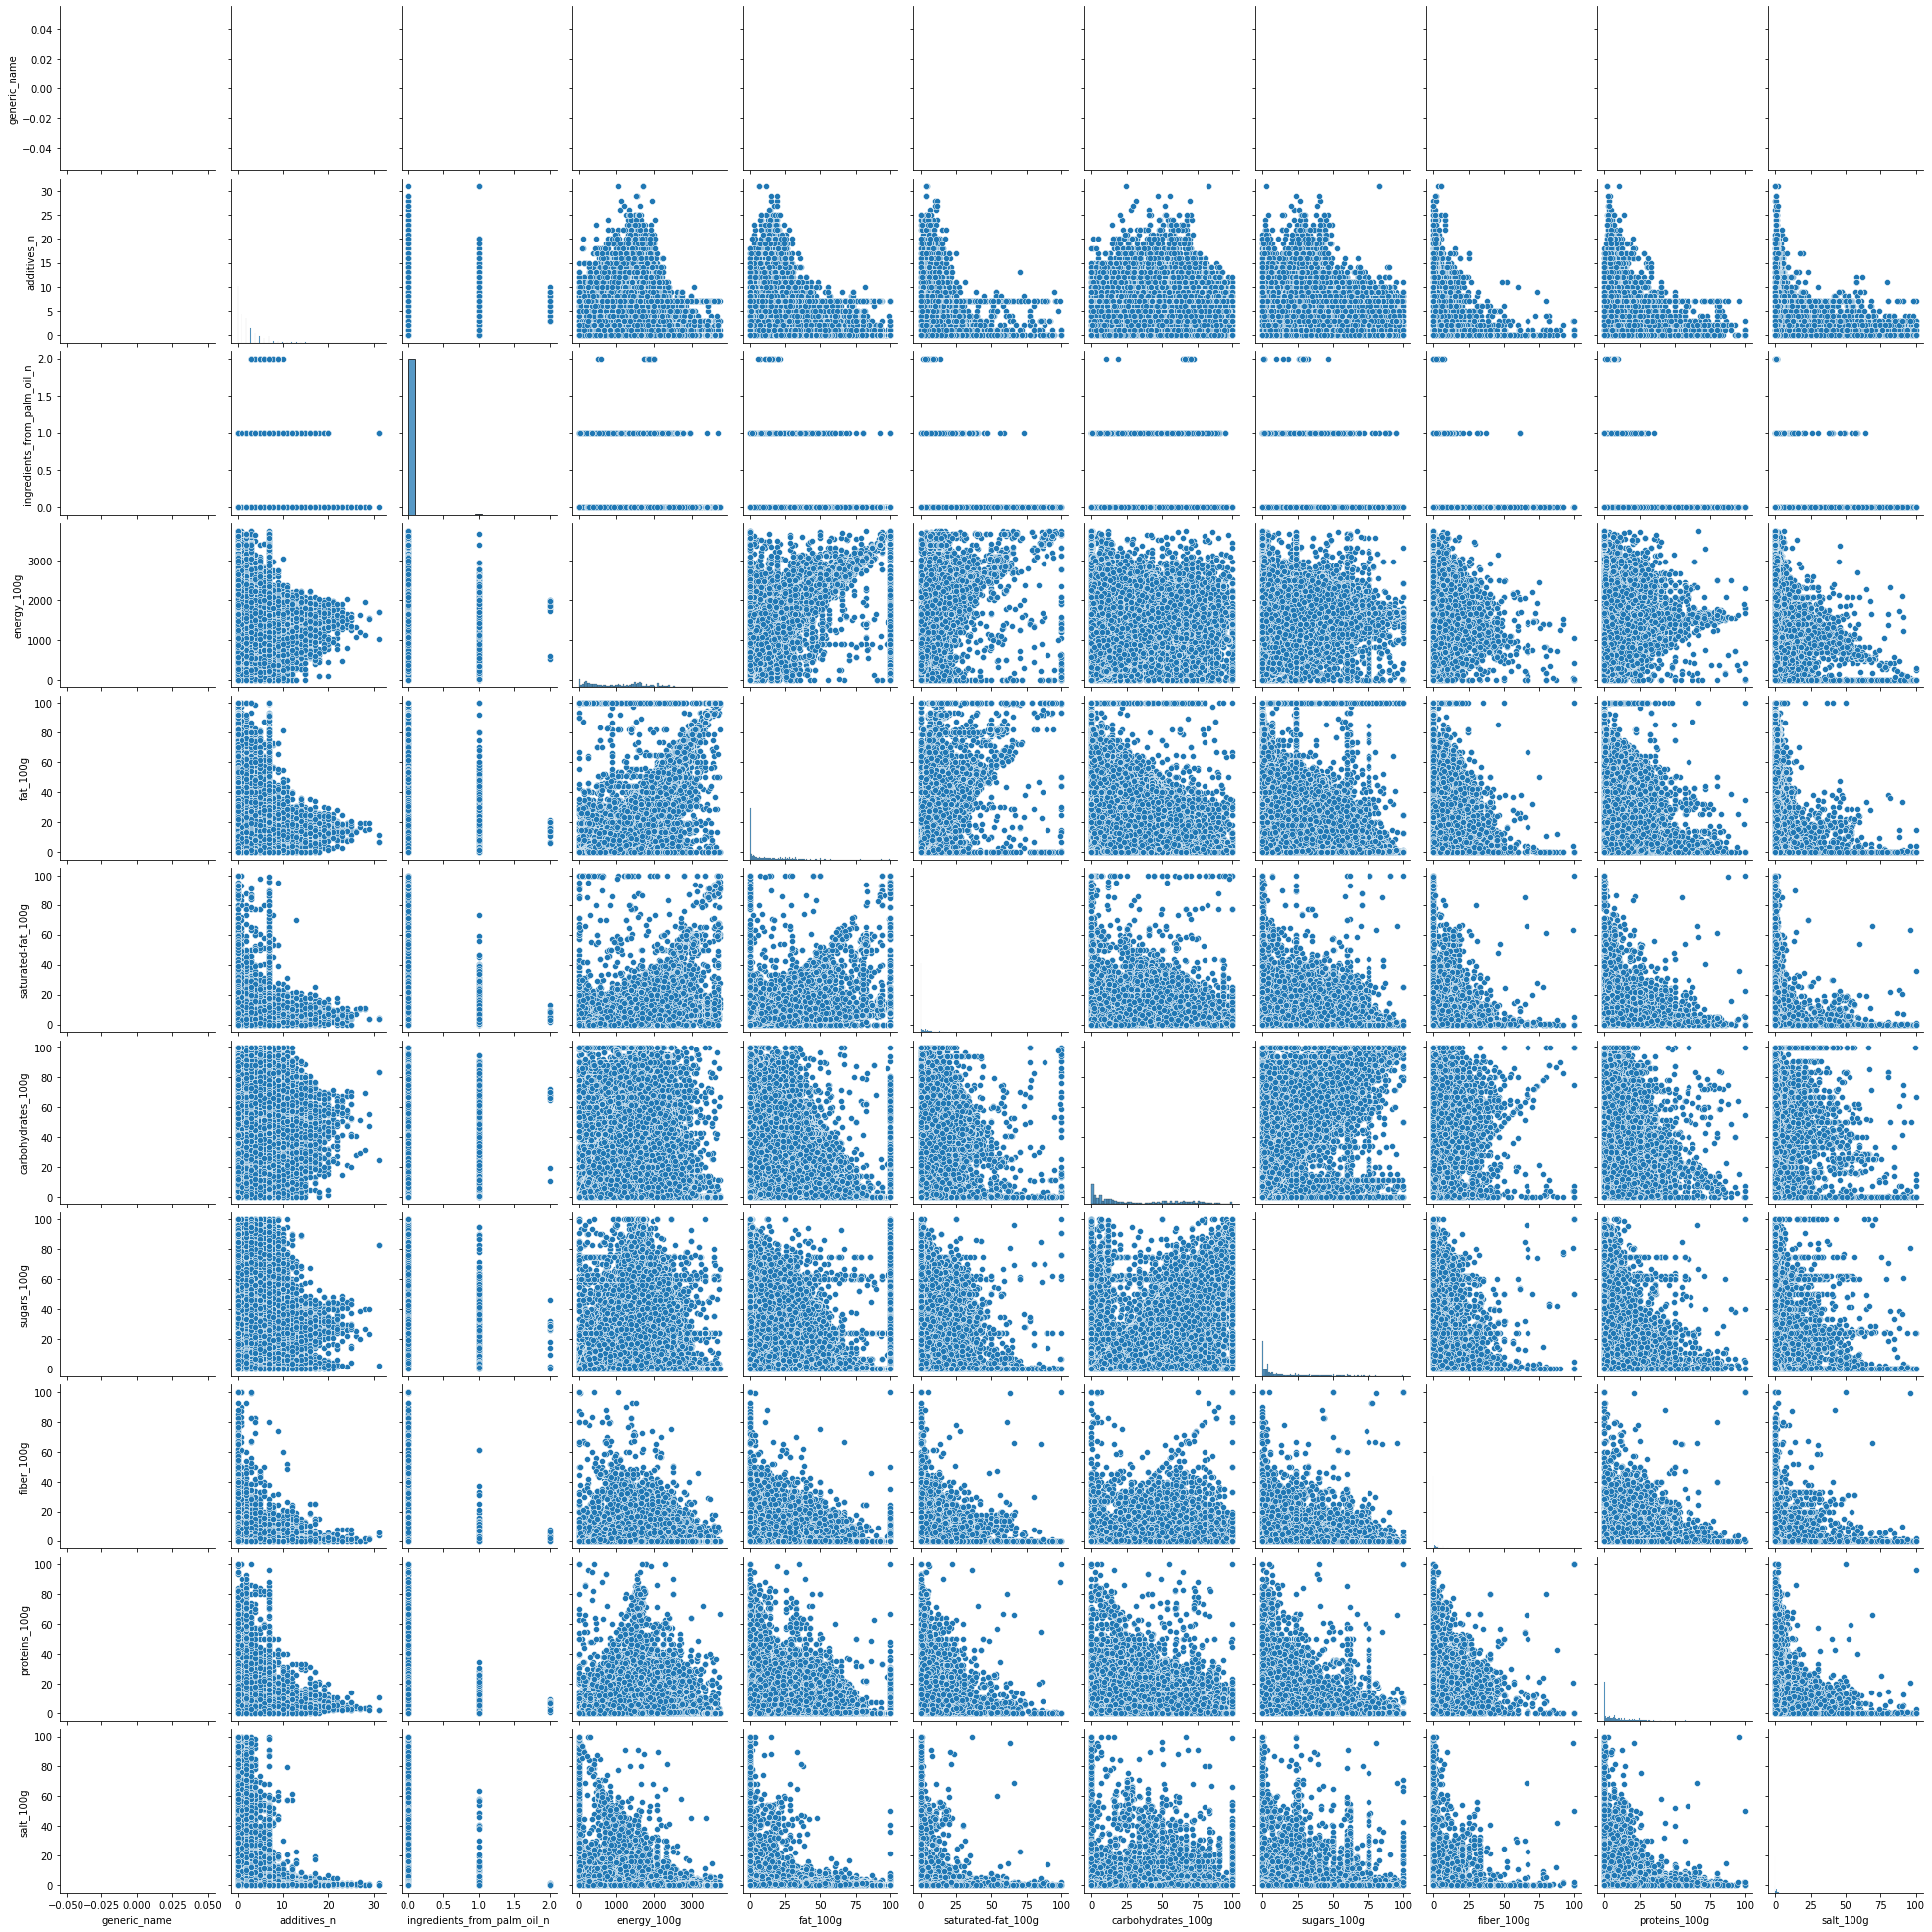

In [33]:
# pairplot
sns.pairplot(data)

<AxesSubplot:>

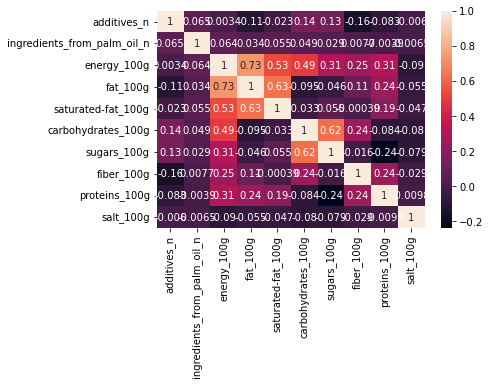

In [34]:
data_corr = data.corr().iloc[1:,1:]

sns.heatmap(data_corr, annot=True)

KruskalResult(statistic=42854.40837403571, pvalue=0.0)


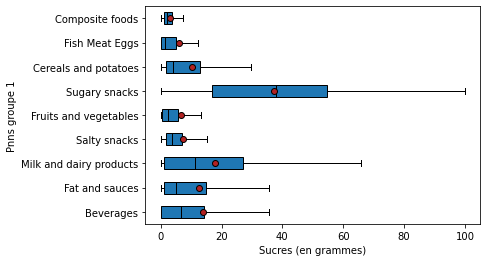

In [35]:
X = "pnns_groups_1" # qualitative
Y = "sugars_100g" # quantitative

modalites = data[X].unique()
groups = []
for m in modalites:
    groups.append(data[data[X]==m][Y])

print(st.kruskal(*groups))
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groups, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Sucres (en grammes)")
plt.ylabel("Pnns groupe 1")
plt.show()
# au moins une des cat ne provient pas de la meme population que les autres

934710.0908413134
777682.3762621601
429498.97979398875
196329.3523706934
512718.51070811925
341055.3141429018
223470.97939791455
412639.6677722213
135828.76834668545
KruskalResult(statistic=43467.41768940502, pvalue=0.0)


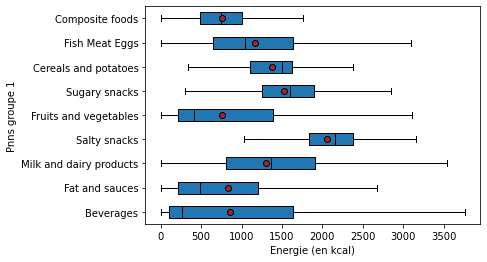

In [36]:
X = "pnns_groups_1" # qualitative
Y = "energy_100g" # quantitative

modalites = data[X].unique()
groups = []
for m in modalites:
    groups.append(data[data[X]==m][Y])
    print(statistics.variance(data[data[X]==m][Y]))

print(st.kruskal(*groups))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groups, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Energie (en kcal)")
plt.ylabel("Pnns groupe 1")
plt.show()

variance pour le groupe e
371979.5959034175
variance pour le groupe d
353735.04949712206
variance pour le groupe c
529594.8867714842
variance pour le groupe b
481511.6406760018
variance pour le groupe a
313625.89532218047
KruskalResult(statistic=79050.51708476021, pvalue=0.0)


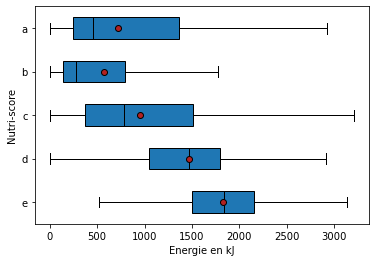

<AxesSubplot:ylabel='Frequency'>

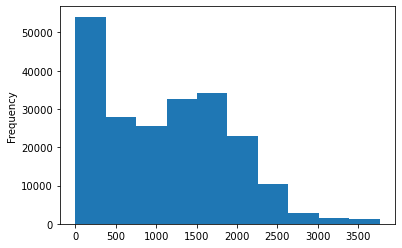

In [37]:
# energy_100g est liée au nutriscore car elle intervient dans le calcul,
# on ne peut pas effectuer d'anova
# la distribution ne suit pas la loi normale

X = "nutrition_grade_fr" # qualitative
Y = "energy_100g" # quantitative

modalites = ['e', 'd', 'c', 'b', 'a']
groupes = []
for m in modalites:
    groupes.append(data[data[X]==m][Y])
    print("variance pour le groupe " + m)
    print(statistics.variance(data[data[X]==m][Y]))

print(st.kruskal(*groupes))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Energie en kJ")
plt.ylabel("Nutri-score")
plt.show()
data[Y].plot.hist()

In [43]:
print(quali_cols, '\n')
print(quant_cols)

['packaging', 'manufacturing_places_tags', 'pnns_groups_1', 'pnns_groups_2', 'nutrition_grade_fr'] 

Index(['additives_n', 'ingredients_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g'],
      dtype='object')


In [44]:
# chi2
X = "pnns_groups_1"
Y = "nutrition_grade_fr"

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

nutrition_grade_fr,a,b,c,d,e,Total
pnns_groups_1,,,,,,
Beverages,516,15462,7977,6535,3473,33963
Cereals and potatoes,5507,1570,5055,3692,543,16367
Composite foods,1714,1441,3132,2124,135,8546
Fat and sauces,225,25079,3857,4555,2641,36357
Fish Meat Eggs,1205,678,3982,6361,4168,16394
Fruits and vegetables,17538,531,2007,973,654,21703
Milk and dairy products,2120,1584,8759,12337,11779,36579
Salty snacks,31,100,907,2511,665,4214
Sugary snacks,231,1605,5435,18233,13744,39248


In [45]:
st_chi2, p_value, st_dof, st_exp = st.chi2_contingency(cont)

In [46]:
print(f"La Pvalue est de {p_value}, elle est inférieure au seuil de 1%,"
      "les variables nutriscore et pnns group 1 ne sont pas indépendantes"
     )

La Pvalue est de 0.0, elle est inférieure au seuil de 1%,les variables nutriscore et pnns group 1 ne sont pas indépendantes


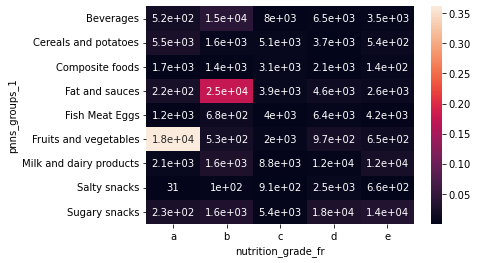

In [47]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

In [54]:
X = "pnns_groups_2"
Y = "nutrition_grade_fr"
sauces_data = data[(data["pnns_groups_1"] == "Fat and sauces") & (data["pnns_groups_2"] != "Alcoholic beverages")]
cont_bis = sauces_data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_bis

nutrition_grade_fr,a,b,c,d,e,Total
pnns_groups_2,,,,,,
Dressings and sauces,220,25020,3672,4064,1422,34398
Fats,5,56,155,485,1217,1918
Total,225,25076,3827,4549,2639,36316


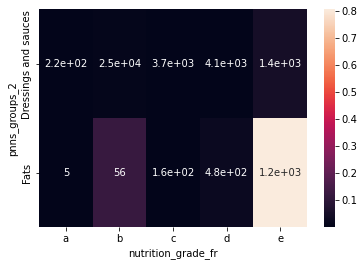

In [55]:
tx = cont_bis.loc[:,["Total"]]
ty = cont_bis.loc[["Total"],:]
n = len(sauces_data)
indep = tx.dot(ty) / n

c = cont_bis.fillna(1)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

In [56]:
st_chi2, p_value, st_dof, st_exp = st.chi2_contingency(cont_bis)
p_value

0.0

## 3- Analyse multivariée

In [46]:
# ACP
data.index

RangeIndex(start=0, stop=213371, step=1)

In [47]:
# choix du nombre de composantes à calculer
n_comp = 6

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data.loc[:,'additives_n':'salt_100g']

# préparation des données pour l'ACP
X = data_pca.values
names = data.index
features = data_pca.columns

In [48]:
# Centrage et 
# Réduction change l'echelle
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [49]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=6)

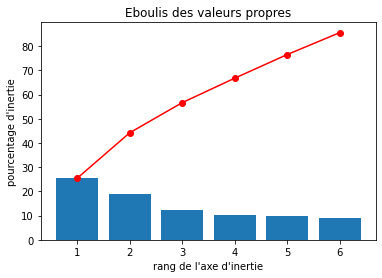

In [50]:
# Eboulis des valeurs propres
display_scree_plot(pca)

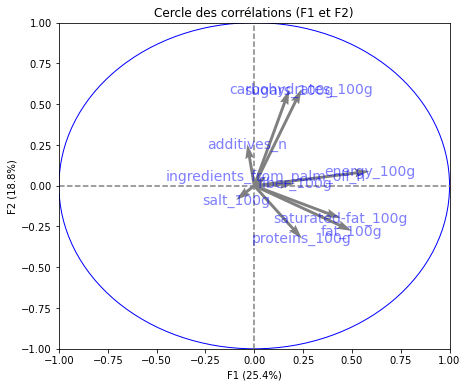

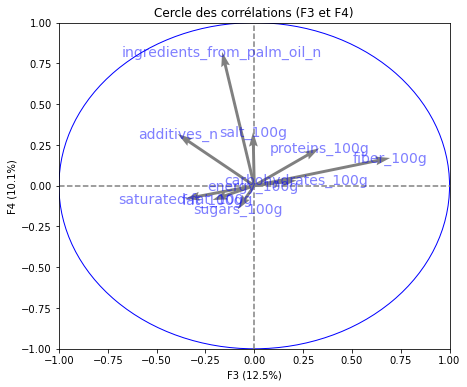

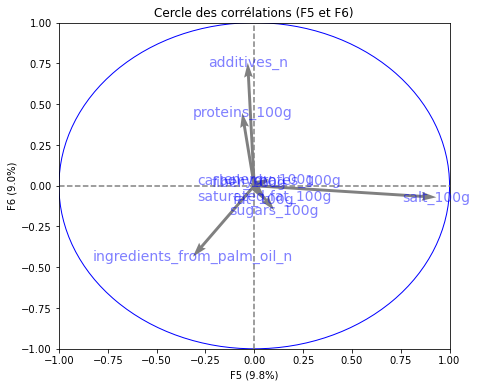

In [51]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

In [52]:
# %matplotlib notebook

<IPython.core.display.Javascript object>


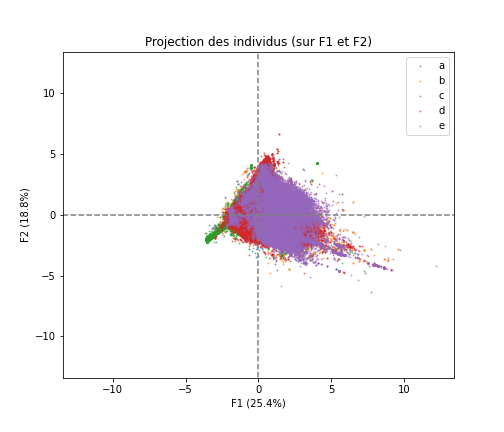

<IPython.core.display.Javascript object>


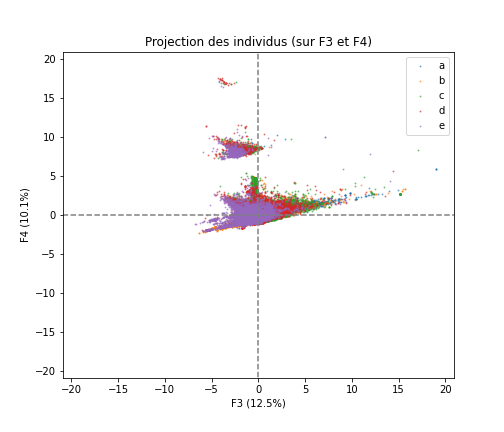

<IPython.core.display.Javascript object>


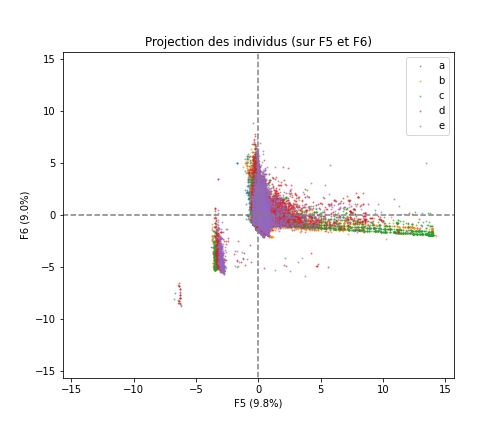

In [53]:
# Projection des individus
X_projected = pca.transform(X_scaled)
nutri_scores = [data.loc[nutriscore, "nutrition_grade_fr"] for nutriscore in data.index]
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var = nutri_scores, alpha=0.5)
# plt.scatter(X_projected[:, 0], X_projected[:, 1], alpha=1)
plt.show()

In [54]:
# merci de votre lecture